# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import sys
sys.setrecursionlimit(1500)

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
temp = []
humidity = []
cloudiness = []
windSpeed = []
all_cities = []
lat = []
long = []
indexNum = 0

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    indexNum = indexNum+1
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cityName = response["name"]
        all_cities.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        temp.append(response["main"]["temp"])
        windSpeed.append(response["wind"]["speed"])
        print(f"Processing record city number {indexNum} | {cityName}")
        time.sleep(1.01)
    except:
        print("city not found")
    continue

city not found
Processing record city number 2 | Chui
city not found
Processing record city number 4 | Port Alfred
Processing record city number 5 | Berlevag
Processing record city number 6 | Camacha
Processing record city number 7 | Naze
Processing record city number 8 | Mount Isa
city not found
Processing record city number 10 | Atuona
Processing record city number 11 | Rikitea
Processing record city number 12 | Pangnirtung
Processing record city number 13 | Qaanaaq
Processing record city number 14 | Mareeba
Processing record city number 15 | Bubaque
Processing record city number 16 | Pacific Grove
Processing record city number 17 | Tiksi
Processing record city number 18 | Sao Filipe
Processing record city number 19 | Biak
city not found
Processing record city number 21 | Castro
city not found
Processing record city number 23 | Ushuaia
Processing record city number 24 | Pevek
Processing record city number 25 | Barrow
Processing record city number 26 | Vestmannaeyjar
Processing record

Processing record city number 198 | Sabang
Processing record city number 199 | Ponta Delgada
city not found
Processing record city number 201 | Lompoc
Processing record city number 202 | Mossamedes
Processing record city number 203 | Marakkanam
Processing record city number 204 | San Jorge
Processing record city number 205 | Makakilo City
Processing record city number 206 | Faya
Processing record city number 207 | Jining
Processing record city number 208 | Sisimiut
Processing record city number 209 | Bambous Virieux
Processing record city number 210 | Kavieng
Processing record city number 211 | Bredasdorp
Processing record city number 212 | Dabat
Processing record city number 213 | Jiangyou
Processing record city number 214 | Zhigalovo
Processing record city number 215 | Nenton
Processing record city number 216 | Xinzhou
city not found
Processing record city number 218 | Bariloche
Processing record city number 219 | Khatanga
city not found
Processing record city number 221 | Faanui
Pro

Processing record city number 392 | Horki
Processing record city number 393 | Hambantota
Processing record city number 394 | Capinzal
Processing record city number 395 | Concordia
Processing record city number 396 | Korla
Processing record city number 397 | Atemar
Processing record city number 398 | Cidreira
Processing record city number 399 | Mumford
Processing record city number 400 | Beinamar
Processing record city number 401 | Shingu
city not found
Processing record city number 403 | Lautaro
Processing record city number 404 | Meulaboh
city not found
Processing record city number 406 | Elko
Processing record city number 407 | North Adams
Processing record city number 408 | Nome
Processing record city number 409 | Abu Dhabi
Processing record city number 410 | Broome
Processing record city number 411 | Marsh Harbour
city not found
Processing record city number 413 | Karakol
Processing record city number 414 | Galveston
Processing record city number 415 | Deputatsky
Processing record 

Processing record city number 584 | Bethanien
Processing record city number 585 | Maba
Processing record city number 586 | Clyde River
Processing record city number 587 | Russellville
Processing record city number 588 | Kachug
Processing record city number 589 | Mayo
Processing record city number 590 | Egvekinot
Processing record city number 591 | Port Hardy
city not found
Processing record city number 593 | Kroya
Processing record city number 594 | Benghazi
Processing record city number 595 | Moree
Processing record city number 596 | Rio Gallegos
Processing record city number 597 | Sur
Processing record city number 598 | Pechenga
Processing record city number 599 | Vigeland
Processing record city number 600 | Belyy Yar
city not found
Processing record city number 602 | Moindou
Processing record city number 603 | Lar
Processing record city number 604 | Menomonie
Processing record city number 605 | Belawan
Processing record city number 606 | The Valley
Processing record city number 607 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame({"City": all_cities, "Temp": temp, "Humidity": humidity,
                  "Cloudiness": cloudiness, "Wind Speed": windSpeed,
                  "Latitude": lat, "Longitude": long})
df

City   Temp  Humidity  Cloudiness  Wind Speed  Latitude  Longitude
0           Chui  68.63        85           0       13.29    -33.70     -53.46
1    Port Alfred  66.99        85          60        5.01    -33.59      26.89
2       Berlevag  24.10        67          65       23.00     70.86      29.09
3        Camacha  60.03        77          20        6.93     33.08     -16.33
4           Naze  64.40        52          75       12.75     28.37     129.48
..           ...    ...       ...         ...         ...       ...        ...
562      Samarai  89.78        57          23        7.02    -10.62     150.67
563      Aasiaat   3.69        93          92       13.85     68.71     -52.87
564         Soyo  79.97        84         100        3.49     -6.13      12.37
565      Jalingo  69.35        19           0        4.99      8.88      11.37
566       Grajau  72.12        95          52        3.62     -5.82     -46.14

[567 rows x 7 columns]

In [6]:
#convert dataframe into a csv
df.to_csv(r'../weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

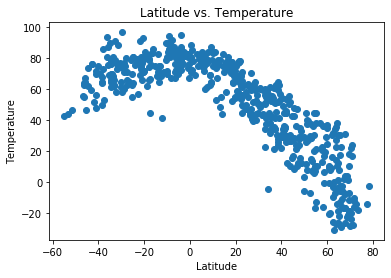

In [7]:
f = plt.figure()
plt.scatter(df["Latitude"], df["Temp"])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
f.savefig("lattemp.png")
plt.show()

In [ ]:
"""Southern Hemisphere temperature increases as you move closer to the equator
and as you cross the equator line and begin to move further away from it,
the temperature begins to decrease
"""

#### Latitude vs. Humidity Plot

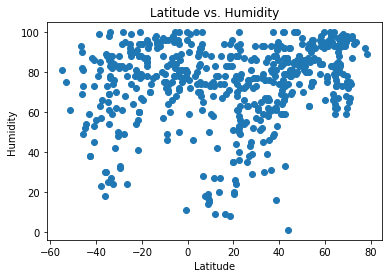

In [8]:
f = plt.figure()
plt.scatter(df["Latitude"], df["Humidity"])
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
f.savefig("lathum.png")
plt.show()

In [ ]:
"""
Humidity is high in the extremes.
"""

#### Latitude vs. Cloudiness Plot

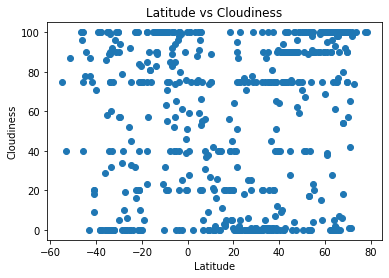

In [9]:
f = plt.figure()
plt.scatter(df["Latitude"], df["Cloudiness"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
f.savefig("latcloud.png")
plt.show()

In [ ]:
"""
There is no clear relationship between latitude and longititude, we notice
that the percent of cloudiness is pretty consistent throughout the whole
plot
"""

#### Latitude vs. Wind Speed Plot

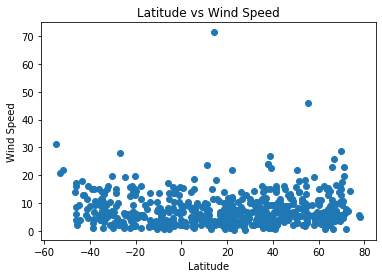

In [10]:
f = plt.figure()
plt.scatter(df["Latitude"], df["Wind Speed"])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
f.savefig("latwind.png")
plt.show()

In [ ]:
"""
Average windspeed is somewhere between 0 and 20 miles an hour and is 
consistent throughout all latitudes.
"""

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def regression (x_values, y_values, x_label, y_label, title, filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    f = plt.figure()
    plt.scatter(x_values,y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    f.savefig(filename)
    plt.show()
    print(line_eq)

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northHem = df[df['Latitude'] > 0]
northHem
southernHem = df[df['Latitude'] < 0]
southernHem

City   Temp  Humidity  Cloudiness  Wind Speed  Latitude  Longitude
0           Chui  68.63        85           0       13.29    -33.70     -53.46
1    Port Alfred  66.99        85          60        5.01    -33.59      26.89
5      Mount Isa  77.00       100          75       13.87    -20.73     139.50
6         Atuona  80.91        79          32       13.62     -9.80    -139.03
7        Rikitea  79.79        78         100        6.22    -23.12    -134.97
..           ...    ...       ...         ...         ...       ...        ...
555       Touros  78.80        88          40        2.24     -5.20     -35.46
557   Valparaiso  61.81        88          40        4.70    -33.04     -71.63
562      Samarai  89.78        57          23        7.02    -10.62     150.67
564         Soyo  79.97        84         100        3.49     -6.13      12.37
566       Grajau  72.12        95          52        3.62     -5.82     -46.14

[194 rows x 7 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

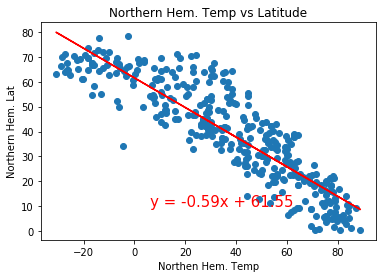

y = -0.59x + 61.55


In [13]:
regression(northHem['Temp'], northHem['Latitude'], "Northen Hem. Temp",
          "Northern Hem. Lat", "Northern Hem. Temp vs Latitude", 
          "northtemplat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

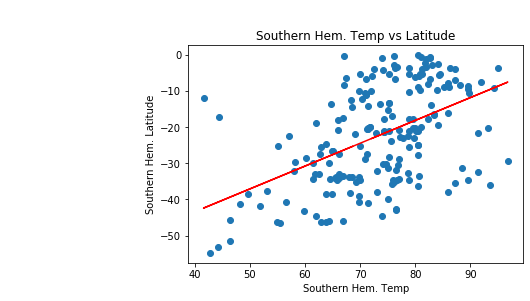

y = 0.63x + -68.71


In [16]:
regression(southernHem['Temp'], southernHem['Latitude'], "Southern Hem. Temp",
          "Southern Hem. Latitude", "Southern Hem. Temp vs Latitude",
          "southhemtemplat.png")

In [ ]:
"""
In the first plot we oberve that Northern Hemisphere temperature and 
latitude display a negative linear relationship. We know this because 
temperature increases as latitude decreases.

In this second plot we observe a positive linear relationship between
southern hemisphere temperature and latitude. As latitude increases, 
temperature also increases.
"""

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

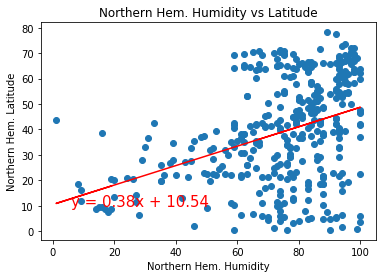

y = 0.38x + 10.54


In [14]:
regression(northHem['Humidity'], northHem['Latitude'], "Northern Hem. Humidity",
          "Northern Hem. Latitude", "Northern Hem. Humidity vs Latitude",
          "northhumlat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

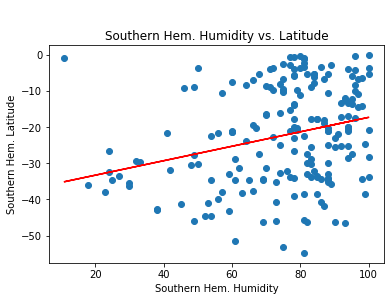

y = 0.2x + -37.31


In [15]:
regression(southernHem['Humidity'], southernHem['Latitude'], "Southern Hem. Humidity", 
          "Southern Hem. Latitude", "Southern Hem. Humidity vs. Latitude",
          "southhumlat.png")

In [ ]:
"""
In both of the humidity plots, we observe that there is a positive 
linear relationship between northern and southern humidity and latitude.
Humidity increases as latitude increases for both hemishperes.

"""

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

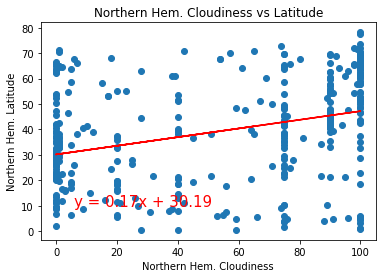

y = 0.17x + 30.19


In [17]:
regression(northHem['Cloudiness'], northHem['Latitude'], "Northern Hem. Cloudiness",
          "Northern Hem. Latitude", "Northern Hem. Cloudiness vs Latitude",
          "northcloudlat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

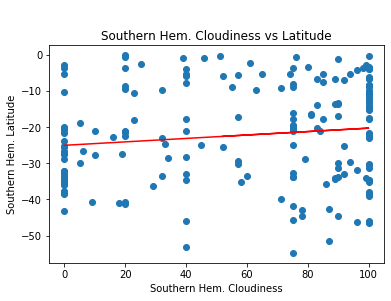

y = 0.05x + -25.03


In [18]:
regression(southernHem['Cloudiness'], southernHem['Latitude'], "Southern Hem. Cloudiness",
          "Southern Hem. Latitude", "Southern Hem. Cloudiness vs Latitude",
          "southcloudlat.png")

In [ ]:
"""
In the above two plots, we observe that there is somewhat of a positive
linear relationship between latitude and cloudiness in both hemispheres.
Even though the relationshp is techincally positive, there isn't much, the
coefficient isn't that large, thus making it difficult to get an accurate
depiction on what the cloudiness would be at a given latitude or what
the latitude would be for a given percent of cloudiness.
"""

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

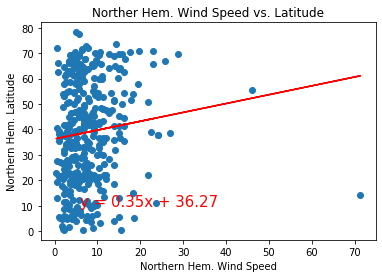

y = 0.35x + 36.27


In [19]:
regression(northHem['Wind Speed'], northHem['Latitude'], "Northern Hem. Wind Speed", 
          "Northern Hem. Latitude", "Norther Hem. Wind Speed vs. Latitude",
          "northwindlat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

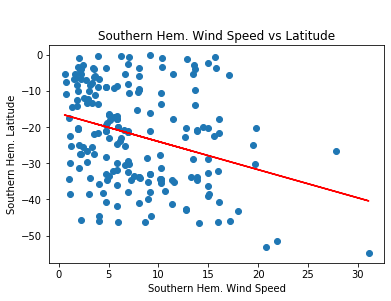

y = -0.78x + -16.19


In [20]:
regression(southernHem['Wind Speed'], southernHem['Latitude'], "Southern Hem. Wind Speed", 
          "Southern Hem. Latitude", "Southern Hem. Wind Speed vs Latitude",
          "southwindlat.png")

In [ ]:
"""
Northern hemisphere wind speed and latitude display a positive linear
relationship whilst southern hemisphere wind speed and latitude display
a negative linear relationship.
"""